# AR-based Anomaly detection with Smoothing

In [1]:
import sys

import matplotlib.pylab as plt
import numpy as np

sys.path.append('../')
from tsdr.outlierdetection.ar import AROutlierDetector

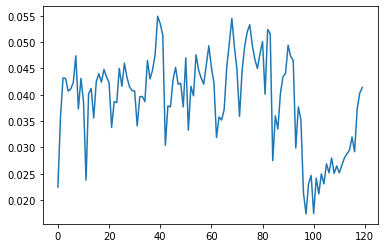

In [2]:
series = {'c-user_cpu_usage_seconds_total': [0.0225, 0.0357, 0.0432, 0.0431, 0.0407,
                                    0.0411, 0.0423, 0.0474, 0.0373, 0.0431,
                                    0.0388, 0.0238, 0.0402, 0.0412, 0.0356,
                                    0.0425, 0.044, 0.0424, 0.0448, 0.0434,
                                    0.0423, 0.0338, 0.0387, 0.0385, 0.045,
                                    0.0416, 0.046, 0.0433, 0.0415, 0.0408,
                                    0.0407, 0.0341, 0.0396, 0.0397, 0.0387,
                                    0.0465, 0.043, 0.0447, 0.0476, 0.0549,
                                    0.0535, 0.0513, 0.0304, 0.0379, 0.0377,
                                    0.0428, 0.0452, 0.042, 0.0422, 0.0377,
                                    0.047, 0.0333, 0.0416, 0.0398, 0.0476,
                                    0.0447, 0.0432, 0.042, 0.0456, 0.0493,
                                    0.0452, 0.0423, 0.0319, 0.0358, 0.0352,
                                    0.0372, 0.0452, 0.0497, 0.0545, 0.0491,
                                    0.0448, 0.0359, 0.0445, 0.0491, 0.0519,
                                    0.0533, 0.0494, 0.0467, 0.045, 0.0478,
                                    0.0501, 0.0401, 0.0524, 0.0516, 0.0275,
                                    0.036, 0.0335, 0.0403, 0.0434, 0.0441,
                                    0.0494, 0.0473, 0.0465, 0.0299, 0.0377,
                                    0.0353, 0.0214, 0.0174, 0.0231, 0.0247,
                                    0.0175, 0.0242, 0.0212, 0.025, 0.0231,
                                    0.0269, 0.0252, 0.028, 0.0251, 0.0265,
                                    0.0252, 0.0266, 0.028, 0.0288, 0.0295,
                                    0.032, 0.0292, 0.0373, 0.0403, 0.0414]}
plt.plot(series['c-user_cpu_usage_seconds_total'])

In [3]:
def ar_scores(x, ar_lag, ar_threshold):
    ar = AROutlierDetector(maxlag=ar_lag)
    scores, preds, model = ar.score(
        x=x,
        regression='n',
        lag=ar_lag,
        autolag=True if ar_lag == 0 else False,
    )
    print(f'lag: {model.ar_lags}')
    plt.plot(scores)
    if not np.all(np.isfinite(scores)):
        raise ValueError(f"scores must contain only finite values. {scores}")
    outliers, abn_th = ar.detect_by_fitting_dist(scores, threshold=ar_threshold)
    return outliers

lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


[(42, 11.926982), (84, 17.53733), (96, 8.5869465)]

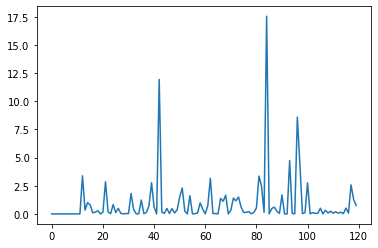

In [4]:
ar_threshold: float = 0.01
ar_lag: int = 12
ar_scores(np.array(series['c-user_cpu_usage_seconds_total']), ar_lag, ar_threshold)

In [5]:
def moving_average(x, w, mode='valid'):
    ret = np.convolve(x, np.ones(w), mode) / w
    plt.plot(ma_x)
    return ret

In [6]:
ma_x = moving_average(np.array(series['c-user_cpu_usage_seconds_total']), w=2, mode='valid')

NameError: name 'ma_x' is not defined

lag: [1, 2, 3, 4, 5]


[(10, 8.839659), (41, 9.243481), (83, 15.707062), (95, 9.747561)]

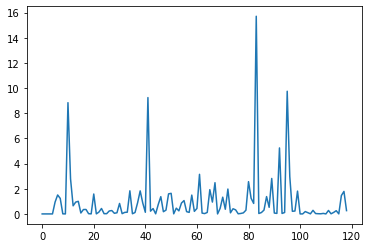

In [ ]:
ar_scores(ma_x, 0, 0.01)

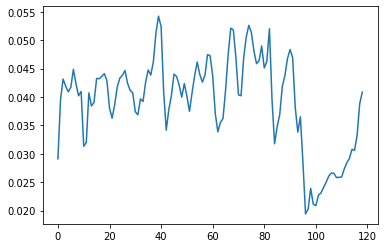

In [ ]:
ma_x = moving_average(np.array(series['c-user_cpu_usage_seconds_total']), w=2, mode='full')

lag: [1, 2, 3, 4, 5]


[(84, 11.807842), (120, 26.091585)]

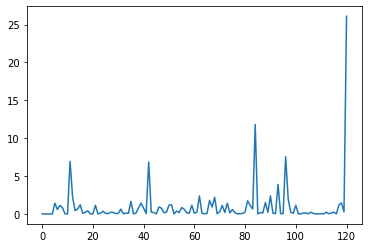

In [ ]:
ar_scores(ma_x, 0, 0.01)

In [ ]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_average_cumsum(x, w):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    ret = (cumsum[w:] - cumsum[:-w]) / w
    plt.plot(ret)
    return ret

In [ ]:
ma_x = moving_average_cumsum(np.array(series['c-user_cpu_usage_seconds_total']), w=2)

NameError: name 'np' is not defined

lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


[(39, 11.769117), (81, 14.913617)]

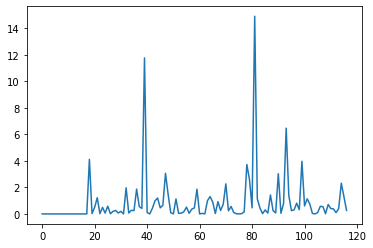

In [ ]:
ar_scores(ma_x, 0, ar_threshold)

In [10]:
import scipy.ndimage as ndimg

def moving_average_uniform_filter1d(x, w):
    ret = ndimg.uniform_filter1d(x, w, mode='constant', origin=-(w//2))[:-(w-1)]
    plt.plot(ret)
    return ret

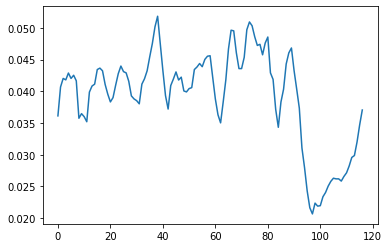

In [13]:
ma_x = moving_average_uniform_filter1d(np.array(series['c-user_cpu_usage_seconds_total']), w=2)

lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


[(39, 11.769117), (81, 14.913617)]

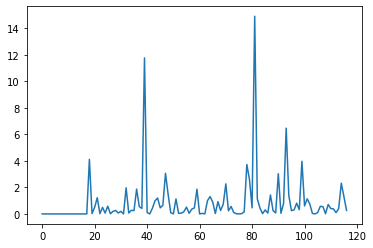

In [19]:
ar_scores(ma_x, 0, ar_threshold)